<CENTER>
<H1>
<font color='blue'>NASA Langley Research Center </font> <BR>
Python 2017 Spring Training<br>
</H1>
</CENTER>

# Introduction to SciPy

## <font color='red'>What will be Covered?</font>

<OL>
<LI> What is SciPy?
<LI> SciPy Organization
<LI> Sample SciPy Modules
<UL>
    <LI> interpolate
    <LI> integrate
    <LI> optimize
    <LI> fftpack
    <LI> Stats
</UL>
</OL>

## <font color='red'>Reference Documents </font>

<OL>
<LI> <A HREF="http://www.sam.math.ethz.ch/~raoulb/teaching/PythonTutorial/intro_scipy.html">First Introduction to SciPy</A>
<LI> <A HREF="http://www.scipy.org/">Home of SciPy</A>
<LI> <A HREF="http://docs.scipy.org/doc/scipy/reference/#reference">SciPy Reference</A>
</OL>

In case you prefer a video:

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("oYTs9HwFGbY")

## <font color='red'>What is SciPy?</font>

<UL>
<LI> Collection of mathematical algorithms and convenience functions built on the Numpy extension for Python.
<LI> Provides high-level commands and classes for manipulating and visualizing data.
<LI> Contains subpackages covering different scientific domains such as Linear Algebra, Signal Processing, Statistics, etc. 
</UL>

### In this presentation, we only want to show the capabilities of SciPy.

## <font color='red'>SciPy Organization</font>

The following packages are available in SciPy:

<table>
<tr> <td> <b> Subpackage </b></td> <td><b> Description </b></td></tr>
<tr> <td>cluster</td> <td> 	Clustering algorithms</td> </tr>
<tr> <td>constants</td> <td> 	Physical and mathematical constants</td> </tr>
<tr> <td>fftpack</td> <td> 	Fast Fourier Transform routines</td> </tr>
<tr> <td>integrate</td> <td> 	Integration and ordinary differential equation solvers</td> </tr>
<tr> <td>interpolate</td> <td> 	Interpolation and smoothing splines</td> </tr>
<tr> <td>io</td> <td> 	Input and Output</td> </tr>
<tr> <td>linalg</td> <td> 	Linear algebra</td> </tr>
<tr> <td>ndimage</td> <td> 	N-dimensional image processing</td> </tr>
<tr> <td>odr</td> <td> 	Orthogonal distance regression</td> </tr>
<tr> <td>optimize</td> <td> 	Optimization and root-finding routines</td> </tr>
<tr> <td>signal</td> <td> 	Signal processing</td> </tr>
<tr> <td>sparse</td> <td> 	Sparse matrices and associated routines</td> </tr>
<tr> <td>spatial</td> <td> 	Spatial data structures and algorithms</td> </tr>
<tr> <td>special</td> <td> 	Special functions</td> </tr>
<tr> <td>stats</td> <td> 	Statistical distributions and functions</td> </tr>
<tr> <td>weave</td> <td> 	C/C++ integration</td> </tr>
</table>

Scipy sub-packages need to be imported separately, for example:

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sp
from scipy import linalg, optimize, interpolate, special, integrate, fftpack

## <font color='red'>Interpolation Problems</font>

#### B-Spline Interpolation

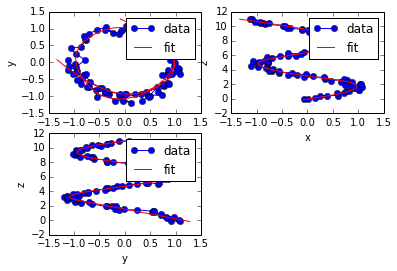

In [2]:
# make ascending spiral in 3-space
t=np.linspace(0,1.75*2*np.pi,100)

x = np.sin(t)
y = np.cos(t)
z = t

# add noise
x+= np.random.normal(scale=0.1, size=x.shape)
y+= np.random.normal(scale=0.1, size=y.shape)
z+= np.random.normal(scale=0.1, size=z.shape)

# spline parameters
s = 3.0   # smoothness parameter
k = 2     # spline order
nest = -1 # estimate of number of knots needed (-1 = maximal)

# Find the B-spline representation 
tckp,u = interpolate.splprep([x,y,z],s=s,k=k,nest=-1)

# evaluate spline, including interpolated points
xnew,ynew,znew = interpolate.splev(np.linspace(0,1,400),tckp)

plt.subplot(2,2,1)
data,=plt.plot(x,y,'bo-',label='data')
fit,=plt.plot(xnew,ynew,'r-',label='fit')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(2,2,2)
data,=plt.plot(x,z,'bo-',label='data')
fit,=plt.plot(xnew,znew,'r-',label='fit')
plt.legend()
plt.xlabel('x')
plt.ylabel('z')

plt.subplot(2,2,3)
data,=plt.plot(y,z,'bo-',label='data')
fit,=plt.plot(ynew,znew,'r-',label='fit')
plt.legend()
plt.xlabel('y')
plt.ylabel('z')

plt.show()

#### Bivariate B-Spine Interpolation

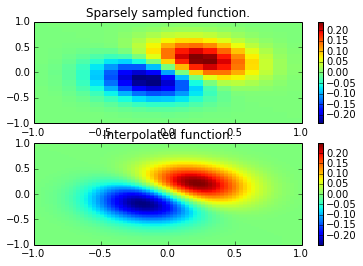

In [3]:
x,y = np.mgrid[-1:1:20j,-1:1:20j]
z = (x+y)*np.exp(-6.0*(x*x+y*y))
plt.subplot(2,1,1)
plt.pcolor(x,y,z)
plt.colorbar()
plt.title("Sparsely sampled function.")

# Interpolate function over new 70x70 grid

xnew,ynew = np.mgrid[-1:1:70j,-1:1:70j]
tck = interpolate.bisplrep(x,y,z,s=0)
znew = interpolate.bisplev(xnew[:,0],ynew[0,:],tck)
plt.subplot(2,1,2)
plt.pcolor(xnew,ynew,znew)
plt.colorbar()
plt.title("Interpolated function.")

## <font color='red'>Integration Problems</font>

#### Compute an integral

In [4]:
%%latex
We want to compute the integral:
    
$$ I = \int_{x=\pi}^{2\pi}\int_{y=0}^{\pi}{(y\sin x + x\cos y)dydx} $$


In [5]:
def integrand(y, x):
    'y must be the first argument, and x the second.'
    return y * np.sin(x) + x * np.cos(y)

ans, err = integrate.dblquad(integrand, 
                             np.pi, 2*np.pi,  # x limits
                   lambda x: 0,               # y limits
                   lambda x: np.pi)
print ans

-9.86960440109


#### Solving ODEs

In [4]:
%%latex
Consider the equation of motion (for the angle $\theta$) of a damped pendulum:

\begin{eqnarray*}
\frac{d^2\theta}{dt^2} = -\frac{1}{Q} \frac{d\theta}{dt} + \sin{\theta} + d \cos{\Omega t}
\end{eqnarray*}

It can be written as a system of ODEs:
\begin{eqnarray*}
\left\{
\begin{array}{rcl}
\frac{d\theta}{dt} & = & \omega \\
\frac{d\omega}{dt} & = & -\frac{1}{Q} \omega + \sin{\theta} + d \cos{\Omega t}
\end{array}
\right.
\end{eqnarray*}


<IPython.core.display.Latex object>

We can use the integrate.odeint function to solve the above system:

           integrate.odeint(func, y0, t, args=())

In [ ]:
def f(y, t, params):
    theta, omega = y      # unpack current values of y
    Q, d, Omega = params  # unpack parameters
    derivs = [omega,      # list of dy/dt=f functions
             -omega/Q + np.sin(theta) + d*np.cos(Omega*t)]
    return derivs

# Parameters
Q = 2.0          # quality factor (inverse damping)
d = 1.5          # forcing amplitude
Omega = 0.65     # drive frequency

# Initial values
theta0 = 0.0     # initial angular displacement
omega0 = 0.0     # initial angular velocity

# Bundle parameters for ODE solver
params = [Q, d, Omega]

# Bundle initial conditions for ODE solver
y0 = [theta0, omega0]

# Make time array for solution
tStop = 200.
tInc = 0.05
t = np.arange(0., tStop, tInc)

# Call the ODE solver
psoln = integrate.odeint(f, y0, t, args=(params,))

# Plot results
fig = plt.figure(1, figsize=(8,8))

# Plot theta as a function of time
ax1 = fig.add_subplot(311)
ax1.plot(t, psoln[:,0])
ax1.set_xlabel('time')
ax1.set_ylabel('theta')

# Plot omega as a function of time
ax2 = fig.add_subplot(312)
ax2.plot(t, psoln[:,1])
ax2.set_xlabel('time')
ax2.set_ylabel('omega')

# Plot omega vs theta
ax3 = fig.add_subplot(313)
twopi = 2.0*np.pi
ax3.plot(psoln[:,0]%twopi, psoln[:,1], '.', ms=1)
ax3.set_xlabel('theta')
ax3.set_ylabel('omega')
ax3.set_xlim(0., twopi)

plt.tight_layout()
plt.show()

## <font color='red'>Optimization Problems</font>

#### Find the local maxima of a function

We want to compute the local maxima of the Bessel function J(x) given initial guess.

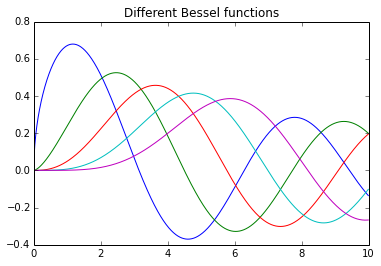

In [8]:
x = np.arange(0,10,0.01)

for k in np.arange(0.5,5.5):
    y = special.jv(k,x)
    plt.plot(x,y)

plt.title('Different Bessel functions')
plt.show()

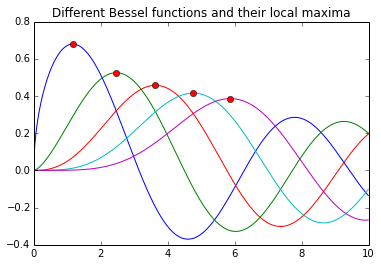

In [9]:
x = np.arange(0,10,0.01)

for k in np.arange(0.5,5.5):
    y = special.jv(k,x)
    plt.plot(x,y)
    f = lambda x: -special.jv(k,x)
    x_max = optimize.fminbound(f,0,6)
    plt.plot([x_max], [special.jv(k,x_max)],'ro')

plt.title('Different Bessel functions and their local maxima')
plt.show()


#### Find the fixed point of a function

In [ ]:
def func(x, c1, c2):
    return np.sqrt(c1/(x+c2))

c1 = np.array([10])
c2 = np.array([3])

fPoint = optimize.fixed_point(func, [1.2], args=(c1,c2))
print fPoint, func(fPoint, c1, c2)

#### Least Square Problem

In [ ]:
## Parametric function: 'v' is the parameter vector, 'x' the independent varible
fp = lambda v, x: v[0]/(x**v[1])*np.sin(v[2]*x)

## Noisy function (used to generate data to fit)
v_real = [1.5, 0.1, 2.]
fn = lambda x: fp(v_real, x)

## Error function
e = lambda v, x, y: (fp(v,x)-y)

## Generating noisy data to fit
n = 30
xmin = 0.1
xmax = 5
x = np.linspace(xmin,xmax,n)
y = fn(x) + np.random.rand(len(x))*0.2*(fn(x).max()-fn(x).min())

## Initial parameter value
v0 = [3., 1, 4.]

## Fitting
v, success = optimize.leastsq(e, v0, args=(x,y), maxfev=10000)

## Plot
def plot_fit():
    print 'Estimater parameters: ', v
    print 'Real parameters: ', v_real
    X = np.linspace(xmin,xmax,n*5)
    plt.plot(x,y,'ro', X, fp(v,X))
    plt.legend(['Orig','LeastSq'], loc=4)

plot_fit()

plt.show()


### <font color='red'>FFT</font>

In [ ]:
%%latex

The FFT $X[k]$ of length $N$ of the length-$N$ sequence $x[n]$ is defined as:
    
    $$ X[k]=\sum_{n=o}^{N-1}{x[n]e^{-j\frac{2\pi}{N}nk}}$$

    and the inverse transform is defined as:
        
    $$ x[n]=\frac{1}{N}\sum_{k=o}^{N-1}{X[k]e^{j\frac{2\pi}{N}kn}}$$    

In [ ]:
# construct signal and plot in the time domain
#---------------------------------------------
plt.figure(figsize=(6,12))
t = np.linspace(0, 1, 1001)
y = np.sin(2*np.pi*t*6) + np.sin(2*np.pi*t*10) + np.sin(2*np.pi*t*13)
plt.subplot(311)
plt.plot(t, y, 'b-')
plt.xlabel("TIME (sec)")
plt.ylabel("SIGNAL MAGNITUDE")

# compute FFT and plot the magnitude spectrum
#--------------------------------------------
F = fftpack.fft(y)
N = len(t)                     # number of samples
dt = 0.001                     # inter-sample time difference
w = fftpack.fftfreq(N, dt)     # gives us a list of frequencies for the FFT
ipos = np.where(w>0)
freqs = w[ipos]                # only look at positive frequencies
mags = np.abs(F[ipos])         # magnitude spectrum
plt.subplot(312)
plt.plot(freqs, mags, 'b-')
plt.ylabel("POWER")

plt.subplot(313)
plt.plot(freqs, mags, 'b-')
plt.xlim([0, 50])          # replot but zoom in on freqs 0-50 Hz
plt.ylabel("POWER")
plt.xlabel("FREQUENCY (Hz)")
plt.show()

### <font color='red'>Solving a Linear Regression Problem</font>

We want to analyze the US population over the years. 
In particular, we want to study the percentage of the urban population 
since the first recorded census.
<P>
<B> Please connect to the website:</B> 
    <P>
[http://www.u-s-history.com/pages/h980.html](http://www.u-s-history.com/pages/h980.html)
<P>
<P>
We want to construct a linear regression model for the percentage of the US urban population.
Here is what we need to do:
<UL>
<LI> Use the Numpy function <em>genfromtxt</em> to read the file <em>populationUS.txt</em> in order to get the years and urban percentages.
<LI> Use the SciPy statistcal function <em>linregress</em> to perform the linear regression.
<LI> Do a scatter plot and graph the best fitted line.
</UL>

In [ ]:
%load linRegres_populationUrban.py

Modify the file <em>linRegres_population.py</em> to:
<UL>
<LI> Also read the rural percentages
<LI> Perform the linear regression on the rural percentage data
<LI> Do the scatter plot and graph the best fitted line.
<LI> Determine the year when the two lines intersect.
</UL>